In [2]:
def year_binner(year,val=10):
    return year - year%val

In [19]:
all_context_files=[]
contextlen=50_000
time_freq=0
from_path='/data/dharp/compounds/datasets/contexts/no_ner'
to_path='/data/dharp/compounds/datasets/contexts/no_ner'
for filename in glob.glob(from_path+'*csv'):
    all_context_files.append(filename)

In [4]:
context_dfs=[]
for f in all_context_files:
    df = pd.read_csv(f,sep="\t")
    context_dfs.append(df)

In [5]:
context_df=pd.concat(context_dfs,ignore_index=True)
context_df.info()
context_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322282832 entries, 0 to 322282831
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   word    object
 1   pos     object
 2   year    int64 
 3   count   int64 
dtypes: int64(2), object(2)
memory usage: 9.6+ GB


,word,pos,year,count
0,"""",NOUN,1883,3
1,"""",NOUN,1884,1
2,"""",NOUN,1885,1
3,"""",NOUN,1886,1
4,"""",NOUN,1888,1
...,...,...,...,...
322282827,,NOUN,2004,23
322282828,,NOUN,2005,29
322282829,,NOUN,2006,20
322282830,,NOUN,2007,8


In [14]:
context_df.pos.value_counts(normalize=True)

NOUN    0.743066
ADJ     0.142027
VERB    0.086661
ADV     0.028246
Name: pos, dtype: float64

In [6]:
selection_df=context_df.groupby(['word','pos'])['count'].sum()

In [15]:
final_choice_df=selection_df.sort_values(ascending=False).head(50_000).to_frame()
final_choice_df.reset_index(inplace=True)
final_choice_df.pos.value_counts(normalize=True)

NOUN    0.72018
ADJ     0.15950
VERB    0.09196
ADV     0.02836
Name: pos, dtype: float64

In [22]:
final_choice_df['word_pos']=final_choice_df.word+"_"+final_choice_df.pos
final_choice_df.word_pos.to_csv(f'{to_path}_{time_freq}_{contextlen}.txt',index=False,sep="\t",header=False)

In [31]:
years=context_df.groupby(['year'])['count'].sum().to_frame()
years.reset_index(inplace=True)
years['perc_count']=years['count']/years['count'].sum()*100
years['decade']=year_binner(years['year'])
years

,year,count,perc_count,decade
0,1505,6163,0.000004,1500
1,1507,11206,0.000007,1500
2,1515,102942,0.000064,1510
3,1520,17273,0.000011,1520
4,1524,84882,0.000053,1520
...,...,...,...,...
420,2004,4681134168,2.918487,2000
421,2005,4516973528,2.816140,2000
422,2006,4868528617,3.035320,2000
423,2007,5214723969,3.251158,2000


In [29]:
years.loc[years.year>=2000]['perc_count'].sum()

25.72734453696924

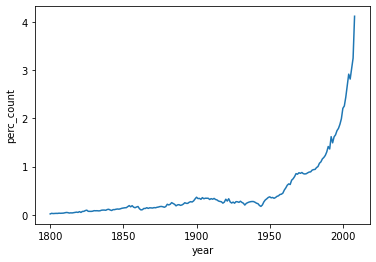

In [43]:
g=sns.lineplot(data=years.loc[years.year>=1800], x="year", y="perc_count")
#g.set_yscale("log")

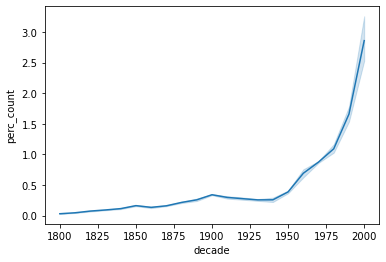

In [44]:
g=sns.lineplot(data=years.loc[years.year>=1800], x="decade", y="perc_count")
#g.set_yscale("log")